In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, rgb2gray
import matplotlib.pyplot as plt
from models import complex_pokemon_model2
import tensorflow.contrib.slim as slim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
Y_train, Y_test = load_data()

loading 0
file_name ../val_256\Places365_val_00000032.jpg is invalid
file_name ../val_256\Places365_val_00000193.jpg is invalid
file_name ../val_256\Places365_val_00000714.jpg is invalid
file_name ../val_256\Places365_val_00000945.jpg is invalid
file_name ../val_256\Places365_val_00000998.jpg is invalid
(997, 256, 256, 3)
Shape of data_train, data_test: (797, 256, 256, 3) (200, 256, 256, 3)


In [26]:

def lrelu(x, leak=0., name='lrelu'):
    return tf.maximum(leak*x, x)

def complex_pokemon_model3(X,train=True):
    
  Y = tf.image.convert_image_dtype(X,tf.float32)

  conv_mat = tf.constant(np.array([[0.299,0.587,0.114],[-0.14713,-0.2888,0.436],[0.615,-0.514999,-0.10001]]),dtype = tf.float32)
  inv_conv_mat = tf.constant(np.array([[1,0,1.13983],[1,-0.39465,-0.58060],[1,2.03211,0]]),dtype = tf.float32)

  Y = tf.reshape(Y,[-1,3])

  YUV = tf.matmul(Y,conv_mat)
  YUV = tf.reshape(inputt,[-1,256,256,3])
  Y = tf.reshape(Y,[-1,256,256,3])
  UV = inputt[:,:,:,1:3]
  YY = inputt[:,:,:,0:1]

  conv1 = lrelu(slim.convolution(YY, 32, 3, stride=1, scope='conv1', normalizer_fn=slim.batch_norm, normalizer_params = {'is_training':train},activation_fn=tf.identity))
  conv2 = lrelu(slim.convolution(conv1, 32, 3, stride=1, scope='conv2', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  conv3 = lrelu(slim.convolution(conv2, 64, 3, stride=1, scope='conv3', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  conv4 = lrelu(slim.convolution(conv3, 64, 3, stride=1, scope='conv4', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  conv13 = lrelu(slim.convolution(conv4, 32, 1, stride=1, scope='conv13', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  conv14 = lrelu(slim.convolution(conv13, 32, 1, stride=1, scope='conv14', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  conv15 = lrelu(slim.convolution(conv14, 16, 1, stride=1, scope='conv15', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  conv16 = lrelu(slim.convolution(conv15, 16, 1, stride=1, scope='conv16', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  conv17 = lrelu(slim.convolution(conv16, 8, 1, stride=1, scope='conv17', normalizer_fn=slim.batch_norm,normalizer_params = {'is_training':train}, activation_fn=tf.identity))
  #if train: conv17 = tf.nn.dropout(conv17, 0.8)
  conv18 = (slim.convolution(conv17, 2, 1, stride=1, scope='conv18', activation_fn=tf.identity))
  #if train: conv18 = tf.nn.dropout(conv18, 0.8)

  a3 = tf.concat((inp,conv18),axis = 3)
  a3 = tf.reshape(a3,[-1,3])
  a2 = tf.matmul(a3,inv_conv_mat)
  a2 = tf.reshape(a2,[-1,256,256,3])

   # hsv_out,rgb_out,hsv_in,rgb_in
  return conv18,a2,UV,Y
   

(797, 256, 256, 3)
[[[ 0.6584458  -1.1401691   0.65403086]
  [ 0.3335945  -1.0338144   0.8374124 ]
  [ 2.8194733  -0.39686152 -0.2187826 ]
  ...
  [ 0.8716749   3.1289904   0.64926666]
  [ 0.46280396  2.2325153   0.56434214]
  [ 1.17841     2.4644847   0.19277966]]

 [[ 1.5934627   3.0469048   1.2011975 ]
  [ 0.2594082  -0.17848898  1.078116  ]
  [ 0.2692688  -0.11097005  1.0894759 ]
  ...
  [ 0.8890492   1.8620617   0.32303825]
  [ 0.02664846 -0.19406442  0.17821243]
  [ 0.04387462 -0.5649129   0.01469811]]

 [[ 0.86093396 -1.2729177   0.52382505]
  [ 3.2053244   5.9478984   1.1116018 ]
  [ 1.0586507  -0.85037297  0.5287925 ]
  ...
  [ 1.3198957   1.8680902   0.06818728]
  [ 0.62868106  1.8864123   0.35108358]
  [ 0.77238256  1.1326753   0.04428383]]

 ...

 [[ 0.68533635 -2.654641   -0.07960173]
  [ 1.3879845   2.1330814   0.72913253]
  [-0.18222952 -5.9445105  -0.41175345]
  ...
  [ 0.25772965  0.77947026  0.20545626]
  [ 0.44703814  1.3816886   0.2183787 ]
  [ 0.49414098 -0.2275961

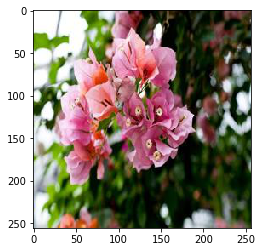

KeyboardInterrupt: 

In [28]:
tf.reset_default_graph()

Y = tf.placeholder(tf.uint8 ,[None , 256,256,3])
is_training = tf.placeholder(tf.bool)

def show_images(images,gray = False):
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);
    plt.show()

print (Y_train.shape)

with tf.variable_scope("model") as scope:
    hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(hsv_out-hsv_in))
    optimiser = tf.train.AdamOptimizer(3e-3)
    train_step = optimiser.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 1
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        #print (losses)
        if(i%100 == 0):
            print(rgb_o[0])
           # show_images(rgb_o[0])
            show_images(rgb_i[0])


num_epochs = 5
for i in range(num_epochs):
    epoch_number = i
    train_epoch(Y_train)
    print ("Next Epoch",i)
    